# CS235 Fall 2025 Course Project

Name: Zipeng Zhu

Student ID: 862309402

## Introduction
In this project, a number of data mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

In [5]:
!pip install ucimlrepo

## Imports

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

## Load Data

In [7]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

X

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

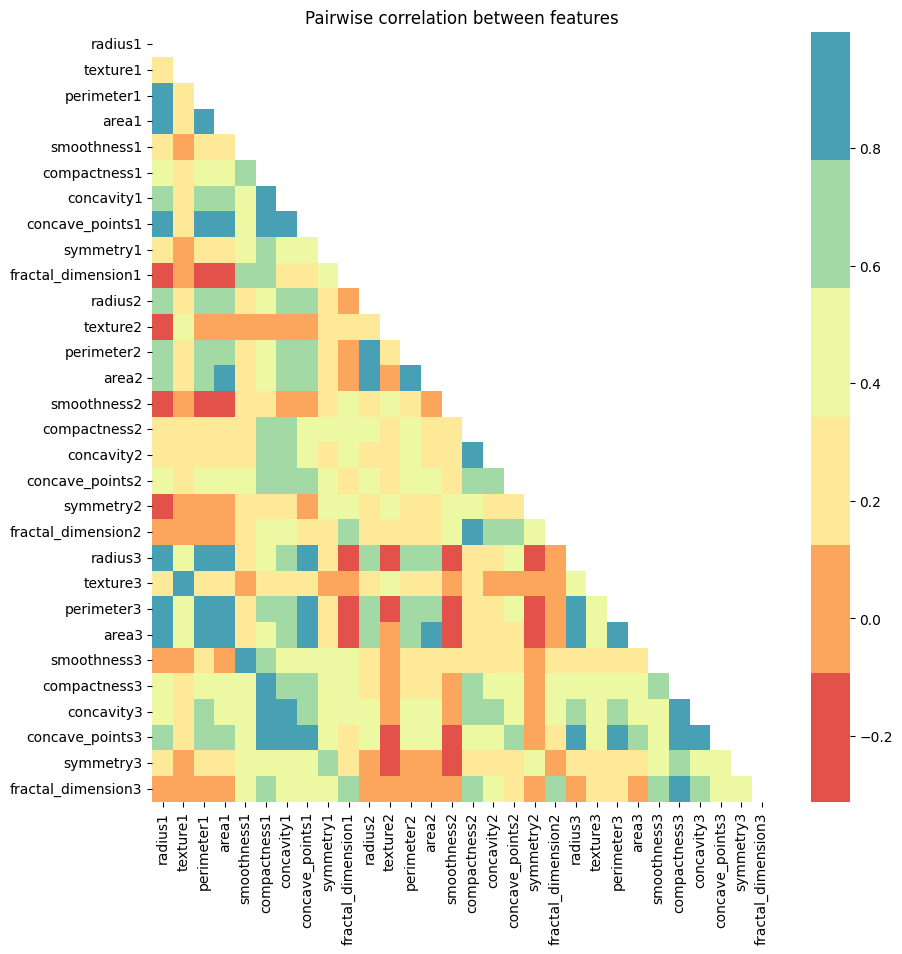

In [34]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class Counts

In [35]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

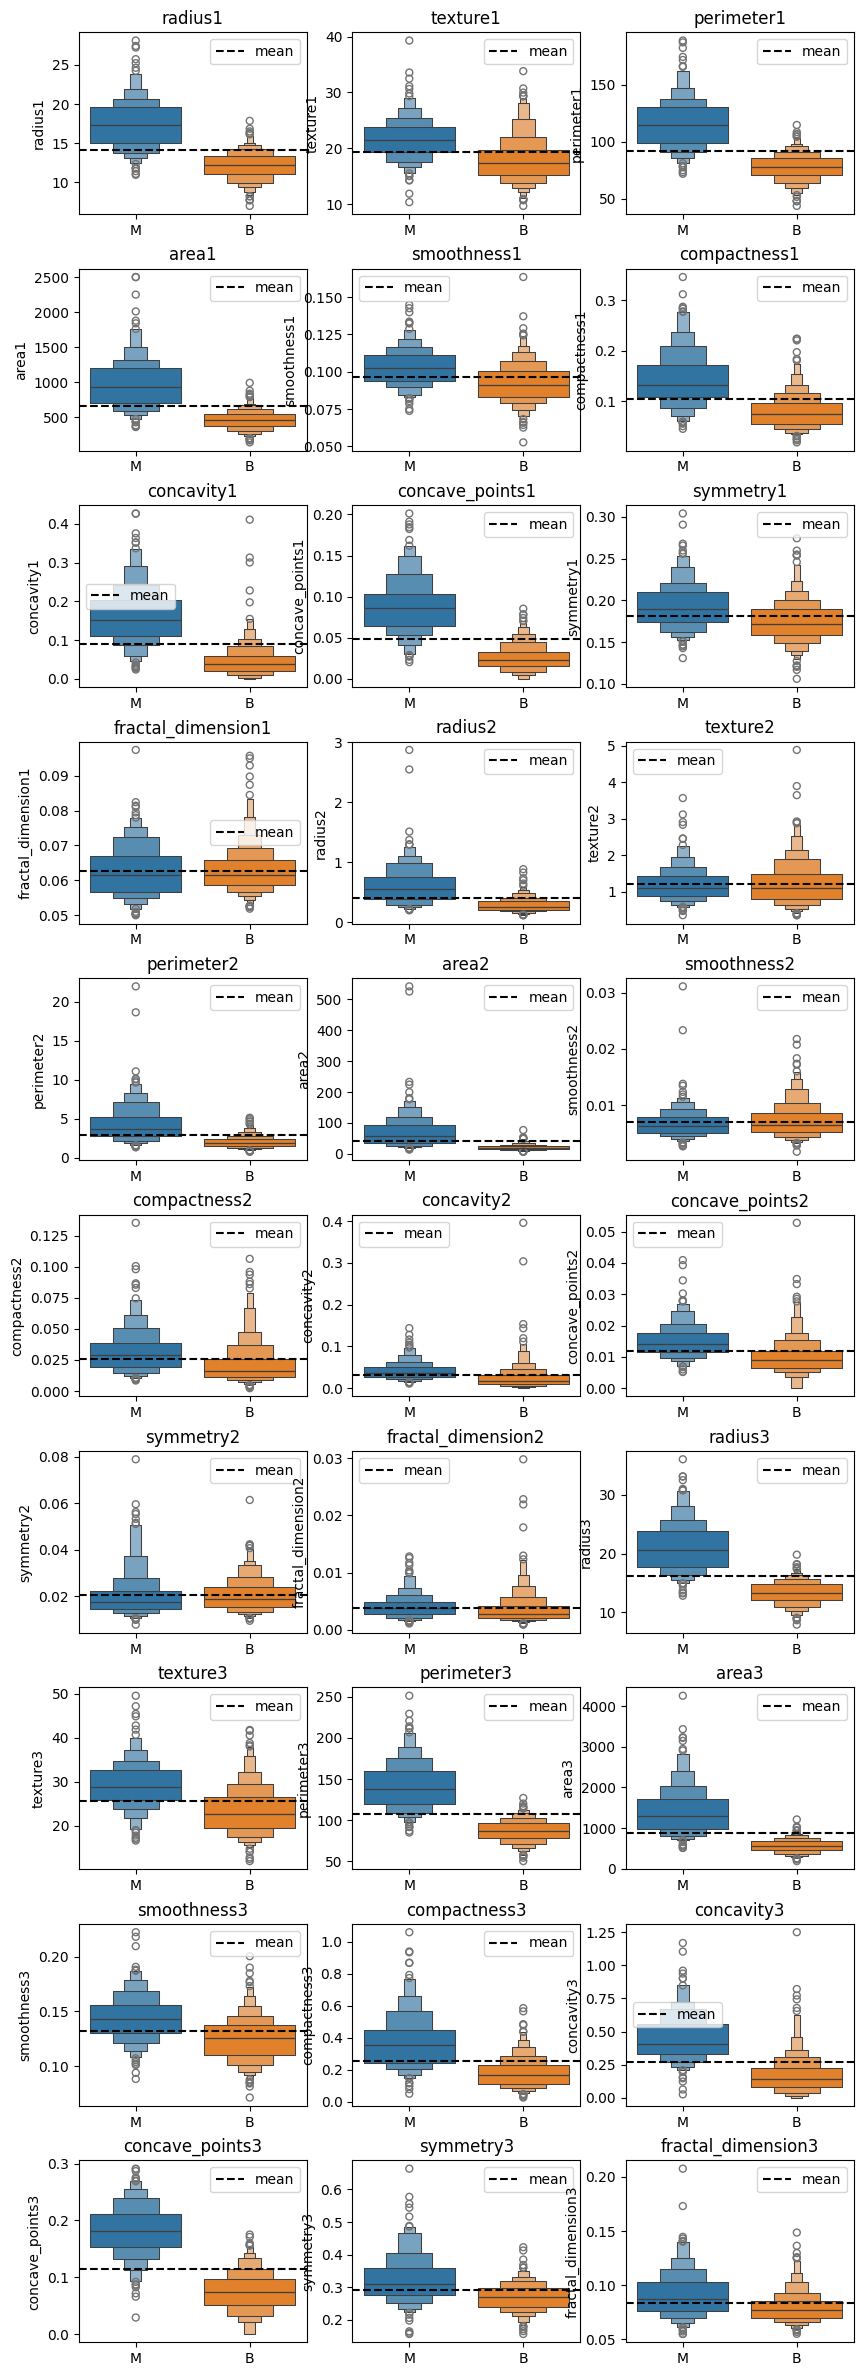

In [36]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]


For Decision Tree Classifer

To do it from scratch, first I using entropy as the impurity measure, then I calculate Information Gain for each potential split and measures the unceertainty reduced by dividing the dataset.

For continuous feature, midpoints between sorted unique values are used as thresholds.The model evauates all features and thresholds to find the best parameter to maximize information gain.

Set a trigger to stop building tree, when maximum depth is reached or all samples belong to single class or no split yields positive gain.

Each leaf node stores the majority class label as its prediction.

fit() method preprocess the data and build the tree recursively, while the predict()method traverses the tree from root to leaf for a single sample and predict_tree() applied the logic to all samples to produce final predictions.

Reference:

Lecture Slide - Decision Tree Classifier

Use Gemini to solve some errors that I cannot solve it.

In [34]:
# decision tree classifier that uses the Information Gain splitting criterion
class DecisionTreeClassifier():
  def __init__(self, max_depth=5, min_samples_split=2):
      self.max_depth = max_depth
      self.min_samples_split = min_samples_split
      self.tree = None

  def entropy(self, y):
    # Compute entropy
      y = np.asarray(y)
      if y.size == 0:
          return 0.0
      _, counts = np.unique(y, return_counts=True)
      p = counts / counts.sum()
      p = np.clip(p, 1e-12, 1.0)
      return -np.sum(p * np.log2(p))

  def information_gain(self, y, X_column, threshold):
    # Calculate how much entropy is reduced by potential split
      H_parent = self.entropy(y)
      left_idx = X_column <= threshold
      right_idx = X_column > threshold
      y_left, y_right = y[left_idx], y[right_idx]
      if len(y_left) == 0 or len(y_right) == 0:
          return 0
      n = len(y)
      # Weighted average of child entropies
      H_left = self.entropy(y_left)
      H_right = self.entropy(y_right)
      weighted = (len(y_left)/n)*H_left + (len(y_right)/n)*H_right
      return H_parent - weighted

  def best_split(self, X, y):
    # Find the feature & threshold that maximize information gain
      best_feature, best_threshold, best_IG = None, None, -np.inf
      for feature in X.columns:
          X_column = X[feature].values
          unique_values = np.unique(X_column)
          if len(unique_values) == 1:
              continue
          # Midpoints between sorted unique values as candiate thresholds
          thresholds = (unique_values[:-1] + unique_values[1:]) / 2
          for threshold in thresholds:
              IG = self.information_gain(y, X_column, threshold)
              if IG > best_IG:
                  best_IG, best_feature, best_threshold = IG, feature, threshold
      return best_feature, best_threshold, best_IG

  def build_tree(self, X, y, depth=0):
    # Write stop criteria
    # meet max depth, small split, or pure node
      if (depth >= self.max_depth or
          len(y) < self.min_samples_split or
          len(np.unique(y)) == 1):
          majority = np.bincount(y).argmax()
          return {"leaf": True, "pred": majority}
      feat, thr, ig = self.best_split(X, y)
      if feat is None or ig <= 1e-7:
          majority = np.bincount(y).argmax()
          return {"leaf": True, "pred": majority}

      # Split data and build subtrees
      left_idx = X[feat] <= thr
      right_idx = X[feat] > thr
      left_tree = self.build_tree(X[left_idx], y[left_idx], depth+1)
      right_tree = self.build_tree(X[right_idx], y[right_idx], depth+1)
      return {"leaf": False, "feat": feat, "thr": thr, "left": left_tree, "right": right_tree}

  def fit(self, X, y):
    # Prepare labels and train the decision tree
      if isinstance(y, pd.DataFrame):
          y = y.iloc[:, 0]
      if isinstance(y, pd.Series):
          first_elem = y.iloc[0]
      elif isinstance(y, np.ndarray):
          first_elem = y[0]
      else:
          first_elem = y

      if isinstance(first_elem, str):
          # Convert MB to 10
          y = pd.Series(y).map({'M': 1, 'B': 0}).values

      y = np.asarray(y).astype(int)

      self.feature_names = list(X.columns)
      self.tree = self.build_tree(X, y)
      self.tree["feat_names"] = self.feature_names
      return self

  def predict(self, x, node=None):
    # Predict One sample by traversing the tree
    if isinstance(x, np.ndarray):
        x = {feat: val for feat, val in zip(self.tree["feat_names"], x)}
    elif isinstance(x, pd.Series):
        x = x.to_dict()
    if node is None:
      node = self.tree
    if node["leaf"]:
      return node["pred"]

    feat, thr = node["feat"], node["thr"]
    if x[feat] <= thr:
      return self.predict(x, node["left"])
    else:
      return self.predict(x, node["right"])

  def predict_tree(self, X):
    # Apply Predict() to every row in the dataset
      preds = []
      for i in range(len(X)):
          x = X.iloc[i]
          preds.append(self.predict(x, self.tree))
      return np.array(preds)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

y_pred = tree.predict_tree(X)
print("Predictions:", y_pred[:10])
print("Truth", y[:10])

Predictions: [1 1 1 0 1 0 1 1 1 1]
Truth   Diagnosis
0         M
1         M
2         M
3         M
4         M
5         M
6         M
7         M
8         M
9         M


For Naive Bayes Classifer:

This models each class using Gaussian Distributions and apply Bayes Theorem to compute posterior probabilities, and predict the class with the highest likelihood.

Because the original label "M" and "B" are catrgorical, I use encoded to 1 and 0.  All features are standardizes to zero mean and unit variance to prevent scalle differences.

The fit() encoded labels, normalizes features, adn computers per-class and priors.

The predict() standardize input data, evaluates log prior and likelihood for each clas, and find the class with the highest posterior probability to each sample.

Reference:

lecture Slide - Naive Bayes Classifer

Let Gemini to teach me how to solve errors that I faced.

In [35]:
# a Naive Bayes classifier which uses Gaussian modeling for continuous features
class NaiveBayesClassifier:
  def __init__(self):
    self.classes = None
    self.mean = {}
    self.var = {}
    self.priors = {}
    self.X_mean = None
    self.X_std = None
    self.label_map = {}
    self.label_inverse_map = {}

  def fit(self, X, y):
    # Make sure X is a numeric numpy array
    X = np.asarray(X, dtype=float)
    # Convert y to a flat numpy array
    y_array = np.array(y).ravel()

    # Build label maps (assume 'M' = 1, everything else = 0)
    if isinstance(y_array[0], str):
      unique_labels = np.unique(y_array)
      self.label_map = {label: idx for idx, label in enumerate(unique_labels)}
      self.label_inverse_map = {idx: label for label, idx in self.label_map.items()}
      y_encoded = np.array([self.label_map[label] for label in y_array])
    else:
      y_encoded = y_array.astype(int)
      unique_labels = np.unique(y_encoded)
      self.label_inverse_map = {int(c): str(c) for c in unique_labels}

    self.classes = np.unique(y_encoded)

    # Compute Gaussian statistics per class
    for c in self.classes:
        X_c = X[y_encoded == c]
        self.mean[c] = X_c.mean(axis=0)

        self.var[c] = X_c.var(axis=0) + 1e-9
        self.priors[c] = X_c.shape[0] / X.shape[0]
    return self

  def gaussian_modeling(self, x, mean, var):
    return -0.5 * (np.log(2 * np.pi * var) + ((x - mean) ** 2) / var)

  def predict(self, X):
    X = np.asarray(X, dtype=float)
    predictions = []

    # Loop over all samples
    for x in X:
        max_posterior = float('-inf')
        best_class = None
        posteriors = []
        # Evaluate posterior probability for each class
        for c in self.classes:
          # log(P(C))
          prior = np.log(self.priors[c])
          # log(P(X|C)) = sum of log(Gaussian(x_i | μ_i, σ_i²))
          likelihoods = np.sum(self.gaussian_modeling(x, self.mean[c], self.var[c]))
          # Combine with prior to get log posterior
          posterior = prior + likelihoods
          posteriors.append(posterior)
        predictions.append(self.classes[np.argmax(posteriors)])
    # Return predictions as an integer array (0/1)
    return np.asarray(predictions, dtype=int)

model = NaiveBayesClassifier()
model.fit(X, y)
print("Predictions:", model.predict(X[:10]))
print("Truth", y[:10])

Predictions: [1 1 1 1 1 1 1 1 1 1]
Truth   Diagnosis
0         M
1         M
2         M
3         M
4         M
5         M
6         M
7         M
8         M
9         M


Decision Tree  - F1 Score: 0.936 ± 0.037
Naive Bayes    - F1 Score: 0.933 ± 0.031


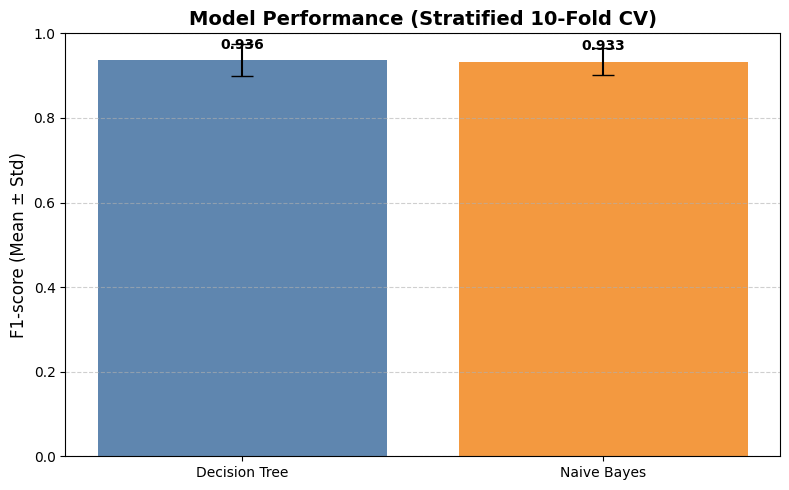

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Convert MB to 10
label_map = {'M': 1, 'B': 0}
y_numeric = np.array([label_map[label] for label in np.array(y).ravel()])


# Evaluation using stratified 10-fold CV
def evaluate_classifier(model_class, X, y, **kwargs):
    """
    Evaluate a custom classifier using Stratified 10-Fold CV and F1-score.
    Returns mean and std of F1 scores.
    """
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)
    f1_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = model_class(**kwargs)
        model.fit(X_train, y_train)
        if hasattr(model, "predict_tree"):
            y_pred = model.predict_tree(X_test)
        else:
            y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average="weighted")
        f1_scores.append(f1)

    return np.mean(f1_scores), np.std(f1_scores)

# evaluation two classifiers
mean_tree, std_tree = evaluate_classifier(DecisionTreeClassifier, X, y_numeric, max_depth=3)
mean_nb, std_nb = evaluate_classifier(NaiveBayesClassifier, X, y_numeric)

print(f"Decision Tree  - F1 Score: {mean_tree:.3f} ± {std_tree:.3f}")
print(f"Naive Bayes    - F1 Score: {mean_nb:.3f} ± {std_nb:.3f}")

# draw bar chart
models = ['Decision Tree', 'Naive Bayes']
means = [mean_tree, mean_nb]
stds = [std_tree, std_nb]
colors = ['#4E79A7', '#F28E2B']

plt.figure(figsize=(8,5))
bars = plt.bar(models, means, yerr=stds, color=colors, alpha=0.9, capsize=8)
plt.ylabel("F1-score (Mean ± Std)", fontsize=12)
plt.title("Model Performance (Stratified 10-Fold CV)", fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the mean of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{mean:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## Q2 - Dimensionality reduction with the Singular Value Decomposition

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

SVD is a dimensionality reduction tool. In this problem I have to analyze how this reduction affects the performance of decision tree classifier and naive bayes classifier We decompose the feature matrix X into three matrices and keep the first k singular values ​​and vectors to form a low order approximation.

I choose ranking k=[2,5,10,20,30] for training and testing. Then I observe how dimensionality affects prediction performance.

In the implementation step, I used stratified 10-fold cross-validation with train and test splits by fold. Use the Z-score to calculate the mean and standard deviation of the training data.

Apply SVD and calculate U, S, Vt using Numpy. The normalized training and test data are then projected into the reduced latent space. Train DecisionTreeClassifier and NaiveBayesClassifer on reduced data.

Calculate the F1 score for each fold and then average it over 10 folds. Visualize the mean and standard deviation of F1-Score for two classifiers.

Reference:

Ask Gemini about what is SVD in detail, help me to understand more specific on the logic of SVD and how to approach the SVD implementation.

Search numpy about function relevant with SVD

Lecture Slide - Dimensionality Reduction.


In [40]:
# [YOUR IMPLEMENTATION CODE HERE]
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
# Defind the SVD ranks to test
ranks = [2, 5, 10, 20, 30]
# Convert M,B to 1,0
label_map = {'M': 1, 'B': 0}
y_numeric = np.array([label_map[label] for label in np.array(y).ravel()])

def svd_reduction(X,y_numeric,ranks):
  # Use Stratified 10-fold CV with SVD dimensioanlity reduction
  # Evaluate Decisin Tree and Naive Bayes Classifers at each rank
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)
  res = []

  for rank in ranks:
    # Initialize scores for the current rank across all folds
    rank_tree_f1_scores = []
    rank_nb_f1_scores = []
    # 10-fold cross validation
    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X,y_numeric)): # Use y_numeric for splitting
      # Split training and test
      X_train = X.iloc[train_idx]
      X_test = X.iloc[test_idx]
      y_train = y_numeric[train_idx]
      y_test = y_numeric[test_idx]
      # Standardize Z-score
      mean_tr = X_train.mean(axis=0)
      std_tr = X_train.std(axis=0)
      std_tr[std_tr == 0] = 1.0
      Xtr_std = (X_train - mean_tr) / std_tr
      Xte_std = (X_test - mean_tr) / std_tr
      # Compute SVD on Standardize Data
      U, S, Vt = np.linalg.svd(Xtr_std, full_matrices=False)
      Vt_k = Vt[:rank, :]
      # Project data into rank k latent space
      X_train_k = np.dot(Xtr_std, Vt_k.T)
      X_test_k = np.dot(Xte_std, Vt_k.T)
      new_cols = [f"SVD_Comp_{i}" for i in range(rank)]
      X_train_k_df = pd.DataFrame(X_train_k, columns=new_cols)
      X_test_k_df = pd.DataFrame(X_test_k, columns=new_cols)

      # Decision Tree
      tree = DecisionTreeClassifier(max_depth=6)
      # Fit the tree with the SVD-transformed X_train_k and numeric y_train
      tree.fit(pd.DataFrame(X_train_k), y_train)
      # Predict with the SVD-transformed X_test_k
      y_pred_tree = tree.predict_tree(pd.DataFrame(X_test_k))

      rank_tree_f1_scores.append(f1_score(y_test, y_pred_tree, average="weighted"))

      # Naive Bayes
      model = NaiveBayesClassifier()
      # Fit the model with the transformed X_train_k and numeric y_train
      model.fit(pd.DataFrame(X_train_k), y_train)
      # Predict with the transformed X_test_k
      y_pred_nb = model.predict(X_test_k)
      rank_nb_f1_scores.append(f1_score(y_test, y_pred_nb, average="weighted"))


    # After processing all folds for a rank, calculate mean and std
    res.append({
        "rank": rank,
        "tree_mean": np.mean(rank_tree_f1_scores),
        "tree_std": np.std(rank_tree_f1_scores),
        "nb_mean": np.mean(rank_nb_f1_scores),
        "nb_std": np.std(rank_nb_f1_scores)
    })
  return res
# Run SVD evaluation
svd_res = svd_reduction(X,y_numeric,ranks)

# Print the summary results
for result in svd_res:
    print(f"Rank {result['rank']}:")
    print(f"  Decision Tree - F1 Score: {result['tree_mean']:.3f} ± {result['tree_std']:.3f}")
    print(f"  Naive Bayes   - F1 Score: {result['nb_mean']:.3f} ± {result['nb_std']:.3f}")

Rank 2:
  Decision Tree - F1 Score: 0.921 ± 0.036
  Naive Bayes   - F1 Score: 0.913 ± 0.028
Rank 5:
  Decision Tree - F1 Score: 0.940 ± 0.040
  Naive Bayes   - F1 Score: 0.927 ± 0.036
Rank 10:
  Decision Tree - F1 Score: 0.935 ± 0.049
  Naive Bayes   - F1 Score: 0.915 ± 0.036
Rank 20:
  Decision Tree - F1 Score: 0.940 ± 0.047
  Naive Bayes   - F1 Score: 0.878 ± 0.043
Rank 30:
  Decision Tree - F1 Score: 0.935 ± 0.046
  Naive Bayes   - F1 Score: 0.850 ± 0.029


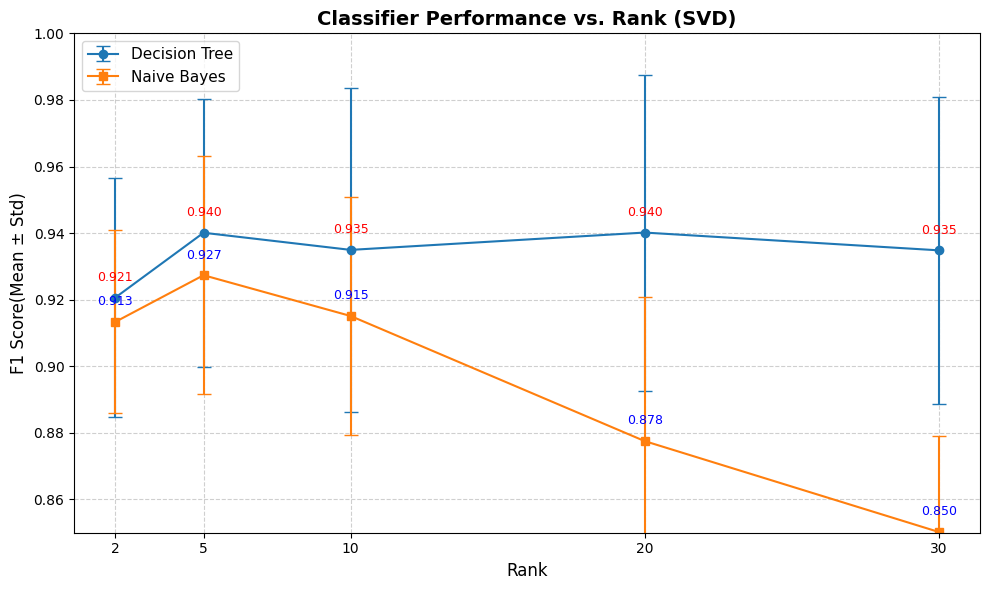

In [41]:
# [YOUR PLOTTING CODE HERE]
import matplotlib.pyplot as plt
ranks = [result['rank'] for result in svd_res]
tree_means = [result['tree_mean'] for result in svd_res]
tree_stds = [result['tree_std'] for result in svd_res]
nb_means = [result['nb_mean'] for result in svd_res]
nb_stds = [result['nb_std'] for result in svd_res]

plt.figure(figsize=(10, 6))

plt.errorbar(ranks, tree_means, yerr=tree_stds, label='Decision Tree', capsize=5, linestyle='-', marker='o')
plt.errorbar(ranks, nb_means, yerr=nb_stds, label='Naive Bayes', capsize=5, linestyle='-', marker='s')
plt.title("Classifier Performance vs. Rank (SVD)", fontsize = 14, fontweight='bold')
plt.xlabel("Rank",fontsize = 12)
plt.ylabel("F1 Score(Mean ± Std)",fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ranks)
plt.ylim(0.85,1.0)
for x, mean in zip(ranks, tree_means):
    plt.text(x, mean + 0.005, f"{mean:.3f}", ha='center', color = 'red',fontsize =9)
for x, mean in zip(ranks, nb_means):
    plt.text(x, mean + 0.005, f"{mean:.3f}", ha='center', color = 'blue', fontsize = 9)
plt.tight_layout()
plt.show()

## Q3 - Feature selection with randomization

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

To implement the feature selection with randomization, we first divided the dataset into two parts: a 20% stratified sample for feature selection and the rest 80% data for final performance reporting.

In the 20% feature selection subset. I apply stratified 5-fold cross validation. For each fold, I train 2 models (One for the original, another one for the randomized one).

Then we use both classifiers: Naive Bayes and Decision Tree and evaluated using the weighted F1 Score to handle class imbalance.

After repeat this process for all features and folds then find the mean of importance drop per feature for each classifer.

Last step, I visualize using the 80%  rest data do performance report by plotting 2 bar charts: One for Naive Bayes and One for Decision Tree. The  plots show each feature's average performance drop and illustrate features contribute from most predictive to least predictive.

Reference:

- Ask Geimini about the detail about randomization and help me explain the core idea of this question. Give me an instruction about processes of randomization.

- Use Gemini to assist me to solve problems that encounter during the implementation.

- Ask Professor about what is the visualization should look like.

In [37]:
# [YOUR IMPLEMENTATION CODE HERE]
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
# convert m,b to 1,0
label_map = {'M': 1, 'B': 0}
y_numeric = np.array([label_map[label] for label in np.array(y).ravel()])
results_nb = []
results_dt = []
# Split data by 20% and 80%
X_sel, X_rest, y_sel, y_rest = train_test_split(X,y_numeric,test_size = 0.8, stratify = y_numeric, random_state =20)
# use stratified 5-fold crossing validation on the 20% data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)
for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X_sel,y_sel)):
  X_train, X_val = X_sel.iloc[train_idx],X_sel.iloc[test_idx]
  y_train, y_val = y_sel[train_idx],y_sel[test_idx]
  # Randomization for each feature
  for feature in X_train.columns:
    # Original Data training
    model = NaiveBayesClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average="weighted")
    # shuffle the data of feature
    X_train_random = X_train.copy()
    X_train_random[feature] = np.random.permutation(X_train_random[feature].values)

    model = NaiveBayesClassifier()
    model.fit(X_train_random, y_train)
    y_pred_random = model.predict(X_val)
    f1_random = f1_score(y_val, y_pred_random, average="weighted")
    # importance drop computation
    importance_drop = ((f1 - f1_random) / f1) *100
    results_nb.append({
        "fold": fold_idx,
        "feature": feature,
        "f1_original": f1,
        "f1_random": f1_random,
        "importance_drop": importance_drop
    })
    # Same with Decision Tree
    tree = DecisionTreeClassifier(max_depth=3)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict_tree(X_val)
    f1_tree = f1_score(y_val, y_pred_tree, average="weighted")

    X_train_tree = X_train.copy()
    X_train_tree[feature] = np.random.permutation(X_train_tree[feature].values)

    model_tree_rand = DecisionTreeClassifier(max_depth=3)
    model_tree_rand.fit(X_train_tree, y_train)
    y_pred_tree_rand = model_tree_rand.predict_tree(X_val)
    f1_tree_rand = f1_score(y_val, y_pred_tree_rand, average="weighted")
    drop_tree = ((f1_tree- f1_tree_rand)/ f1_tree) * 100
    results_dt.append({
        "fold" : fold_idx,
        "feature" : feature,
        "f1_original" : f1_tree,
        "f1_random" : f1_tree_rand,
        "importance_drop" : drop_tree
    })
# summarize result and compute mean and std.
df_nb = pd.DataFrame(results_nb)
feature_importance_nb = (
    df_nb.groupby("feature").agg({
        "f1_original": ["mean", "std"],
        "f1_random": ["mean", "std"],
        "importance_drop": ["mean", "std"]
    })
    .reset_index()
)
feature_importance_nb.columns = [
    "feature",
    "f1_original_mean", "f1_original_std",
    "f1_random_mean", "f1_random_std",
    "importance_drop_mean", "importance_drop_std"
]
# Sort from most predictive
feature_importance_nb = feature_importance_nb.sort_values("importance_drop_mean", ascending=False)

df_dt = pd.DataFrame(results_dt)
feature_importance_dt = (
    df_dt.groupby("feature").agg({
        "f1_original": ["mean", "std"],
        "f1_random": ["mean", "std"],
        "importance_drop": ["mean", "std"]
    })
    .reset_index()
)
feature_importance_dt.columns = [
    "feature",
    "f1_original_mean", "f1_original_std",
    "f1_random_mean", "f1_random_std",
    "importance_drop_mean", "importance_drop_std"
]
feature_importance_dt = feature_importance_dt.sort_values("importance_drop_mean", ascending=False)
print("Naive Bayes Classifier:")
print(feature_importance_nb)
print("\nDecision Tree Classifier:")
print(feature_importance_dt)

Naive Bayes Classifier:
               feature  f1_original_mean  f1_original_std  f1_random_mean  \
0                area1          0.937026         0.061065        0.937026   
1                area2          0.937026         0.061065        0.937026   
2                area3          0.937026         0.061065        0.937026   
8      concave_points3          0.937026         0.061065        0.937026   
11          concavity3          0.937026         0.061065        0.937026   
28            texture2          0.937026         0.061065        0.937026   
22         smoothness2          0.937026         0.061065        0.937026   
25           symmetry2          0.937026         0.061065        0.937026   
19             radius2          0.937026         0.061065        0.937026   
20             radius3          0.937026         0.061065        0.937026   
18             radius1          0.937026         0.061065        0.937026   
17          perimeter3          0.937026         0.0

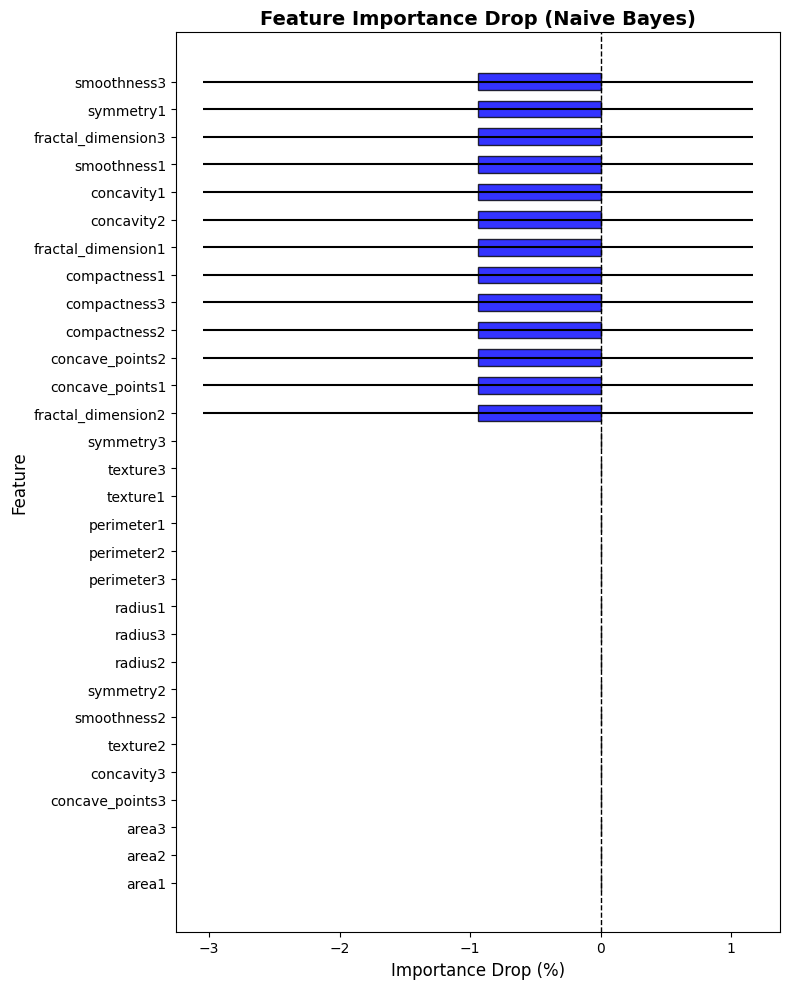

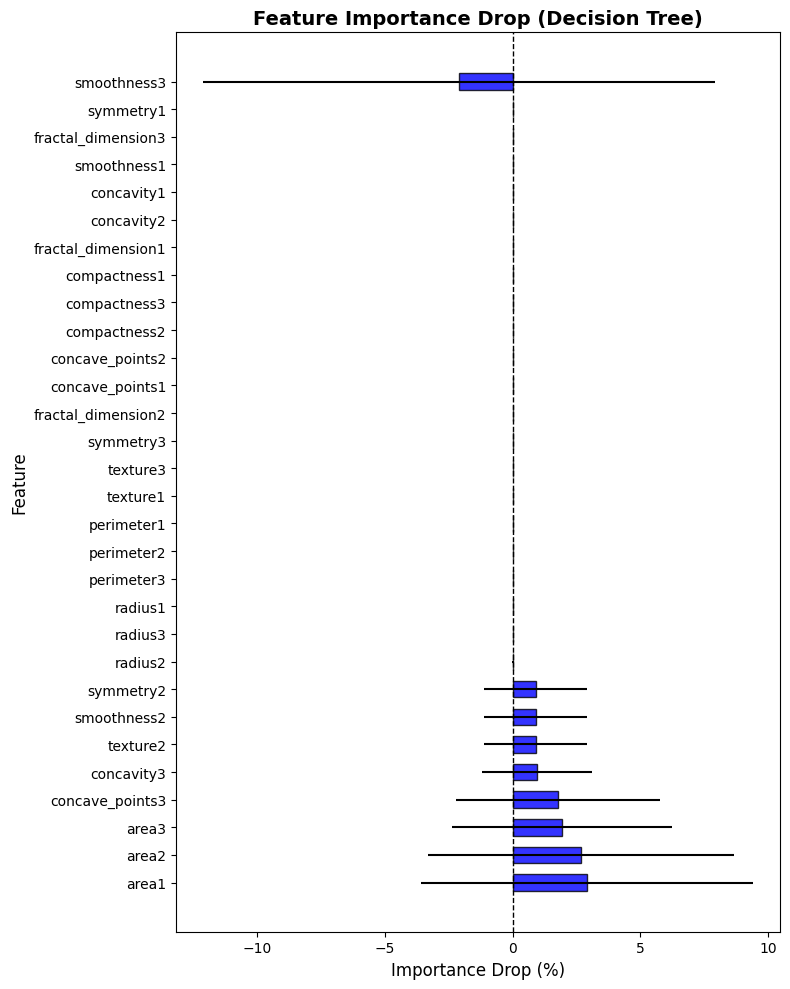

In [38]:
# [YOUR PLOTTING CODE HERE]
plt.figure(figsize = (8,10))
y_pos = np.arange(len(feature_importance_nb["feature"]))
plt.barh(y = y_pos, width= feature_importance_nb["importance_drop_mean"],xerr = feature_importance_nb["importance_drop_std"], color = "blue" ,alpha = 0.8, height = 0.6, edgecolor = "black")
plt.yticks(y_pos, feature_importance_nb["feature"], fontsize=10)
plt.axvline(x = 0, color = "black", linestyle = "--", linewidth =1)
plt.xlabel("Importance Drop (%)", fontsize = 12)
plt.ylabel("Feature", fontsize = 12)
plt.title("Feature Importance Drop (Naive Bayes)", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()

plt.figure(figsize= (8,10))
plt.barh(y = y_pos, width= feature_importance_dt["importance_drop_mean"],xerr = feature_importance_dt["importance_drop_std"], color = "blue" ,alpha = 0.8, height = 0.6, edgecolor = "black")
plt.yticks(y_pos, feature_importance_nb["feature"], fontsize=10)
plt.axvline(x = 0, color = "black", linestyle = "--", linewidth =1)
plt.xlabel("Importance Drop (%)", fontsize = 12)
plt.ylabel("Feature", fontsize = 12)
plt.title("Feature Importance Drop (Decision Tree)", fontsize = 14, fontweight = "bold")
plt.tight_layout()
plt.show()



```
# This is formatted as code
```

## Q4 - Data augmentation using SMOTE

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

To implement the SMOTE, I follow the pseudocode presented in thr original paper that show in the assignment's reference.

First, I need to use Nearest Neighbor Search. To use it, I have to create function to compute Euclidean Distance and return results to the find_KNN function. The find_KNN() returns the each minority, the indices of its K nearest neighbors.

Second, Based on the pseudocode, for each $x_i$, randomly select one of its k neighbors, then creeate a synthetic sample using the formula in the pseudocode where gap is a random number.

Third, Evaluation using the stratified 10-fold
cross validation with Naive Bayes and Decision Tree Classifer. For each classifer, the weighted F1 score was computed under N = 100%, 200%, 300% and K=1,5.

Last, Visualiation, I create 2 plot to show the K=1 and K=5 for naive bayes and Decision Tree.

Reference:

Using the original Paper of SMOTE:
synthetic minority over-sampling technique.

Using Gemini to help me figure out errors during the implementation.

In [44]:
# [YOUR IMPLEMENTATION CODE HERE]
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
# Calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
# Find K Nearest Neighbors
def find_KNN(X_min, k):
    n = len(X_min)
    neighbors = []
    for i in range(n):
        distances = np.array([euclidean_distance(X_min[i], X_min[j]) for j in range(n)])
        indices = np.argsort(distances)[1:k+1]
        neighbors.append(indices)
    return np.array(neighbors)
# Generate synthetic samples based on neighbors
def populate(X_min, neighbors, N):
    n_samples, n_features = X_min.shape
    n_new_per_sample = int(N / 100)
    synth_samples = []
    for i in range(n_samples):
        for _ in range(n_new_per_sample):
            nn_list = neighbors[i]
            # randomly pick one from the k nearest
            random_nn = np.random.choice(nn_list)
            x_i = X_min[i]
            x_nn = X_min[random_nn]
            gap = np.random.rand()
            x_new = x_i + gap * (x_nn - x_i)
            synth_samples.append(x_new)
    return np.array(synth_samples)
# SMOTE
def smote(X, y, k, N, minority_class=1, random_state=20):
    np.random.seed(random_state)
    X = np.asarray(X, dtype=float)
    y = np.asarray(y)
    # Select all samples from the minority class
    X_min = X[y == minority_class]
    n_min = len(X_min)
    if n_min == 0:
        return X, y
    # Handle case when oversampling < 100%
    if N < 100:
        n_to_sample = int((N / 100) * n_min)
        idx = np.random.choice(n_min, n_to_sample, replace=False)
        X_min = X_min[idx]
        N = 100
    # Find K nearest neighbors and synthesize new samples
    neighbors = find_KNN(X_min, k)
    synth = populate(X_min, neighbors, N)
    X_res = np.vstack((X, synth))
    y_res = np.hstack((y, np.full(len(synth), minority_class)))
    return X_res, y_res

# Evaluate SMOTE Performance with Naive Bayes & Decision Tree
def evaluate_smote(X, y, oversample_rates=[100,200,300], k_values=[1,5], random_state=20):
  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
  results_nb = {k: [] for k in k_values}
  results_dt = {k: [] for k in k_values}
  # Iterate oveer both K value and oversampling rates
  for k in k_values:
    for rate in oversample_rates:
      f1_nb_list = []
      f1_dt_list = []
      for train_idx, test_idx in skf.split(X, y):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]

        # Standardization
        scaler = StandardScaler()
        X_train_std = pd.DataFrame(scaler.fit_transform(X_train),
                                    columns=X_train.columns,
                                    index=X_train.index)
        X_test_std = pd.DataFrame(scaler.transform(X_test),
                                  columns=X_train.columns,
                                  index=X_test.index)
        # Apply SMOTHE to generate synthetic minority samples
        X_res_np, y_res = smote(X_train_std.values, y_train, k=k, N=rate,
                                minority_class=1, random_state=random_state)

        X_res_df = pd.DataFrame(X_res_np, columns=X_train.columns)

        # -- Decision Tree --
        dt = DecisionTreeClassifier(max_depth=3)
        dt.fit(X_res_df, y_res)
        y_pred_dt = dt.predict_tree(X_test_std)
        f1_dt_list.append(f1_score(y_test, y_pred_dt, average="weighted"))

        # -- Naive Bayes --
        nb = NaiveBayesClassifier()
        nb.fit(X_res_df, y_res)
        y_pred_nb = nb.predict(X_test_std)
        f1_nb_list.append(f1_score(y_test, y_pred_nb, average="weighted"))
      # Store the average and std of F1
      results_nb[k].append((rate, np.mean(f1_nb_list), np.std(f1_nb_list)))
      results_dt[k].append((rate, np.mean(f1_dt_list), np.std(f1_dt_list)))

  return results_nb, results_dt

results_nb, results_dt = evaluate_smote(X, y_numeric)
print("Naive Bayes SMOTE:\n")
for k, vals in results_nb.items():
    print(f"k = {k}")
    for rate, mean, std in vals:
        print(f"Rate = {rate:.0f}% | F1 = {mean:.3f} ± {std:.3f}")
    print()

print("\nDecision Tree SMOTE:\n")
for k, vals in results_dt.items():
    print(f"k = {k}")
    for rate, mean, std in vals:
        print(f"Rate = {rate:.0f}% | F1 = {mean:.3f} ± {std:.3f}")
    print()

Naive Bayes SMOTE:

k = 1
Rate = 100% | F1 = 0.936 ± 0.030
Rate = 200% | F1 = 0.936 ± 0.030
Rate = 300% | F1 = 0.938 ± 0.027

k = 5
Rate = 100% | F1 = 0.936 ± 0.030
Rate = 200% | F1 = 0.938 ± 0.027
Rate = 300% | F1 = 0.942 ± 0.025


Decision Tree SMOTE:

k = 1
Rate = 100% | F1 = 0.916 ± 0.026
Rate = 200% | F1 = 0.928 ± 0.028
Rate = 300% | F1 = 0.900 ± 0.023

k = 5
Rate = 100% | F1 = 0.917 ± 0.033
Rate = 200% | F1 = 0.916 ± 0.028
Rate = 300% | F1 = 0.906 ± 0.019



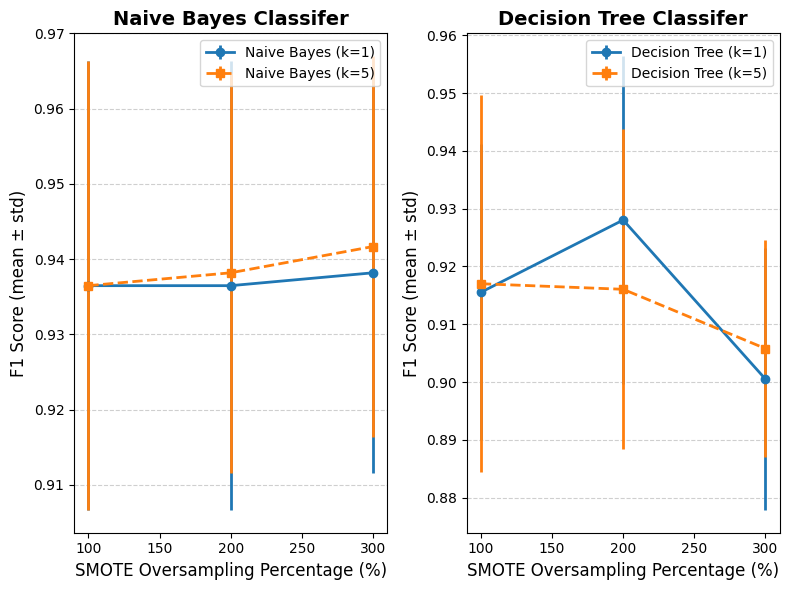

In [45]:
# [YOUR PLOTTING CODE HERE]
import matplotlib.pyplot as plt
import numpy as np

def plot_smote(df_nb, df_dt):
    df_nb = df_nb.sort_values(["k","rate"])
    df_dt = df_dt.sort_values(["k","rate"])

    plt.figure(figsize=(8,6))

    # Naive Bayes
    plt.subplot(1, 2, 1)
    for k, ls, marker in [(1, "-", "o"), (5, "--", "s")]:
        sub = df_nb[df_nb["k"] == k]
        plt.errorbar(sub["rate"], sub["mean"],yerr = sub["std"],
                 linestyle=ls, marker=marker, linewidth=2,
                 label=f"Naive Bayes (k={k})")
    plt.xlabel("SMOTE Oversampling Percentage (%)", fontsize=12)
    plt.ylabel("F1 Score (mean ± std)", fontsize=12)
    plt.title("Naive Bayes Classifer", fontsize=14, fontweight="bold")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()

    # Decision Tree
    plt.subplot(1, 2, 2)
    for k, ls, marker in [(1, "-", "o"), (5, "--", "s")]:
        sub = df_dt[df_dt["k"] == k]
        plt.errorbar(sub["rate"], sub["mean"], yerr = sub["std"],
                 linestyle=ls, marker=marker, linewidth=2,
                 label=f"Decision Tree (k={k})")
    plt.xlabel("SMOTE Oversampling Percentage (%)", fontsize=12)
    plt.ylabel("F1 Score (mean ± std)", fontsize=12)
    plt.title("Decision Tree Classifer", fontsize=14, fontweight="bold")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()

    plt.tight_layout()
    plt.show()
df_nb = pd.DataFrame([(k, rate, mean, std) for k, vals in results_nb.items() for rate, mean, std in vals],
                     columns=["k", "rate", "mean", "std"])
df_dt = pd.DataFrame([(k, rate, mean, std) for k, vals in results_dt.items() for rate, mean, std in vals],
                     columns=["k", "rate", "mean", "std"])
plot_smote(df_nb, df_dt)

# Phase 2 - Unsupervised Techniques

In this second phase we are going to focus on unsupervised techniques including different clustering
paradigms (partitioning, density-based, and graph-based).

For all clustering results reported in this phase, when referring to “performance” you should run
the clustering algorithm 10 times with different random initializations and report the average +/-
standard deviation of the Silhouette coefficient. You may use the existing Silhouette implementation
of Sklearn. When plotting the performance, you should always produce error-bars. Whenever your
figure contains more than one line/graph (e.g., performance of two classifiers), you should always
make sure those are easily distinguishable (use different colors and markers) and make sure you
include a legend.

## 1. k-means clustering [10pts]

### What to implement:

You should implement Lloyd’s algorithm for k-means clustering and
the k-means++ initialization algorithm as described in [5]. Your code should have an option
to use either fully random or k-means++ initialization.

### What to plot:

The performance of k-means for k ranging from 1 to 5 when using completely
random initialization and when using k-means++

[INSERT HERE: a brief description of how you went about implementing the solution to the question]

This question implements Lloyd’s K-means clustering algorithm from scratch and compares two centroid initialization strategies: random initialization and k-means++.

For random initialization, the algorithm selects
k points uniformly at random.
For k-means++, the first centroid is chosen randomly, and subsequent centroids are selected with probability proportional to the squared distance from the nearest existing centroid, which reduces the likelihood of poor initial placements.

After initialization, the algorithm repeatedly computes the Euclidean distance from each point to all centroids, assigns each point to its nearest centroid, and updates the centroids as the mean of their assigned points. Empty clusters are handled by reinitializing their centroids to a random data point. The procedure stops when the centroid shift falls below a tolerance threshold or when the maximum number of iterations is reached.

To evaluate performance, for each
k = {1,2,3,4,5}, the algorithm is executed 10 times with different random seeds, reducing randomness bias and revealing the variability of each initialization method. Clustering quality is measured using the Silhouette Score, and the run_kmeans function reports both the mean and standard deviation across the 10 runs.

Finally, results are visualized with a line plot and error bars, enabling comparison between the stability and effectiveness of random initialization and k-means++.

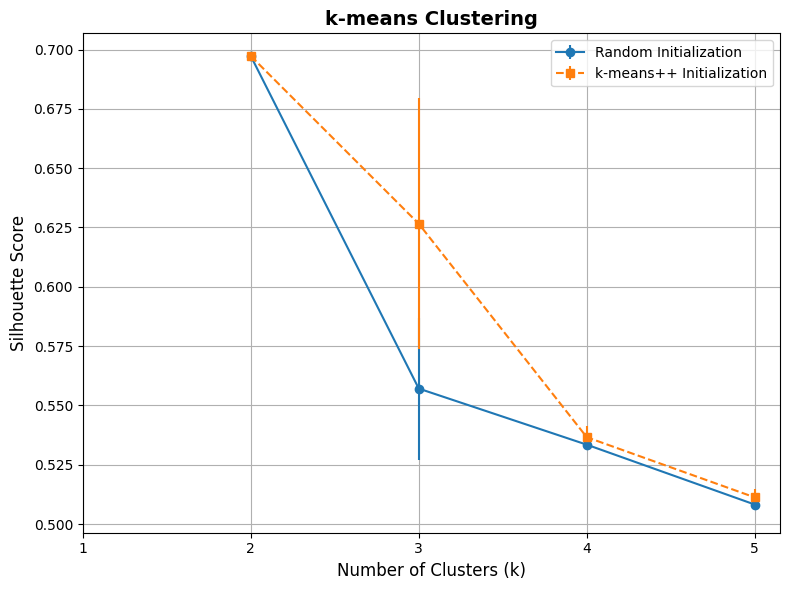

In [8]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
  # Implement from sratch of the K-mean clustering by random initialization and k-means++ initalization
  def __init__(self, n_clusters, max_iter = 300, init_type = "random", random_state = 42, tol = 1e-4):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.init_type = init_type
    self.random_state = random_state
    self.tol = tol
    self.centroids = None
    self.labels = None

  def get_rng(self):
    # return a numpy random generator initialized with the given seed
    return np.random.default_rng(self.random_state)

  def init_centroids_random(self, X, rng):
    # randomly select k distinct points from the dataset as initial centroids
    n_samples = X.shape[0]
    indices = rng.choice(n_samples, size = self.n_clusters, replace = False)
    centroids = X[indices].copy()
    return centroids

  def init_centroids_kmeanspp(self, X, rng):
    # k-mean++ initalization
    n_samples, n_features = X.shape
    centroids = []
    # Pick the first centroid at random
    first_idx = rng.integers(0, n_samples)
    centroids.append(X[first_idx])
    # select the rest centroids
    for _ in range(1, self.n_clusters):
      distances_sq = np.full(n_samples, np.inf)
      # compute distance from every point to the nearest chosen centroid
      for centroid in centroids:
        diff = X - centroid
        dist_sq = np.sum(diff ** 2, axis = 1)
        # keep the minimum distance found
        distances_sq = np.minimum(distances_sq, dist_sq)
      # Compute Sampling probabilities
      total = np.sum(distances_sq)
      if total == 0:
        probs = np.full(n_samples, 1 / n_samples)
      else:
        probs = distances_sq / total
      # Find the next centroids base on the calculated probabilities
      next_idx = rng.choice(n_samples, p = probs)
      centroids.append(X[next_idx])
    centroids = np.vstack(centroids)
    return centroids

  def init_centroids(self, X, rng):
    # Dispatcher that calls the chosen initialization
    if self.init_type == "random":
      return self.init_centroids_random(X, rng)
    elif self.init_type == "kmeans++":
      return self.init_centroids_kmeanspp(X, rng)
    else:
      raise ValueError("init_type not right")

  def compute_distance(self, X, centroids):
    # Compute squared euclidean distance
    diff = X[:, np.newaxis, :] - centroids[np.newaxis, :, :]
    distances = np.sum(diff ** 2, axis = 2)
    return distances

  def assign_labels(self, distances):
    # assign each data point to the nearest centroid
    return np.argmin(distances, axis = 1)

  def update_centroids(self, X, labels, rng):
    # Update centroids as the mean of assigned points
    n_samples, n_features = X.shape
    new_centroids = np.zeros((self.n_clusters, n_features))
    # If a cluster becomes empty, reinitialize its random centroid
    for k in range(self.n_clusters):
      cluster_points = X[labels == k]
      if len(cluster_points) == 0:
        rand_idx = rng.integers(0, n_samples)
        new_centroids[k] = X[rand_idx]
      else:
        new_centroids[k] = np.mean(cluster_points, axis = 0)
    return new_centroids

  def has_converged(self, centroids, new_centroids):
    # Converged if the shift is smaller than the tolerance threshold
    shift = np.linalg.norm(centroids - new_centroids)
    return shift < self.tol

  def fit(self, X):
    # run the main k-means
    X = np.asarray(X)
    rng = self.get_rng()
    centroids = self.init_centroids(X, rng)
    for i in range(self.max_iter):
      distances = self.compute_distance(X, centroids)
      labels = self.assign_labels(distances)
      new_centroids = self.update_centroids(X, labels, rng)
      if self.has_converged(centroids, new_centroids):
        break
      centroids = new_centroids
    self.centroids = centroids
    self.labels = labels
    return self

  def fit_predict(self, X):
    self.fit(X)
    return self.labels

def run_kmeans(X, k_values, n_runs = 10, init_type='random', base_seed = 0):
  X = np.asarray(X)
  mean_scores = []
  std_scores = []
  for k in k_values:
    # Silhouette score is not defined for k=1
    if k == 1:
      mean_scores.append(np.nan)
      std_scores.append(np.nan)
      continue

    scores = []
    # Run 10 times with different random seed
    for i in range(n_runs):
      seed = base_seed + i
      model = KMeans(n_clusters=k, max_iter = 300, tol=1e-4, init_type=init_type, random_state=seed)
      labels = model.fit_predict(X)
      # If only one cluster, silhouette score is invalid
      if len(np.unique(labels)) < 2:
        continue
      score = silhouette_score(X, labels)
      scores.append(score)
    # compute statistics across valid runs
    if len(scores) == 0:
      mean_scores.append(np.nan)
      std_scores.append(np.nan)
    else:
      mean_scores.append(np.mean(scores))
      std_scores.append(np.std(scores))
  return np.array(mean_scores),np.array(std_scores)

def plot_kmeans(k_values, mean_scores, std_scores, kpp_mean,kpp_std):
  # plot and compare between random and k-means++
  k_values = np.array(k_values)
  plt.figure(figsize = (8,6))

  plt.errorbar(k_values,
                mean_scores,
                yerr = std_scores,
                marker = "o",
                linestyle = "-",
                label = "Random Initialization")

  plt.errorbar(k_values,
                kpp_mean,
                yerr = kpp_std,
                marker = "s",
                linestyle = "--",
                label = "k-means++ Initialization")
  plt.xlabel("Number of Clusters (k)", fontsize = 12)
  plt.ylabel("Silhouette Score", fontsize = 12)
  plt.title("k-means Clustering", fontsize = 14, fontweight = "bold")
  plt.legend()
  plt.grid(True)
  plt.xticks(k_values)
  plt.tight_layout()
  plt.show()

X_array = X.values
k_values = [1,2,3,4,5]

random_mean, random_std = run_kmeans(
    X_array, k_values=k_values, init_type="random", n_runs=10, base_seed=0)

kpp_mean, kpp_std = run_kmeans(
    X_array, k_values=k_values, init_type="kmeans++", n_runs=10, base_seed=100)

plot_kmeans(k_values, random_mean, random_std, kpp_mean, kpp_std)

## 2. Density-based clustering with DBSCAN [15pts]

  ### What to implement:

  You should implement the DBSCAN algorithm

  ### What to plot:

The performance of DBSCAN as a function of MinPts (taking values [5, 10,
15, 20] and for (1) Eps = 0.1 and (2) Eps = 0.2 (two lines in total))

[INSERT HERE: a brief description of how you went about implementing the solution to the question]

This question implements DBSCAN from scratch and evaluates how clustering performance varies with different values of eps and MinPts.

DBSCAN identifies clusters based on density: points with at least MinPts neighbors within distance eps are treated as core points, and clusters grow through density-connected regions. Points that do not meet this condition are labeled as noise.

Following the problem instructions, the experiment first used eps = 0.1 and 0.2. After scaling the data, these eps values were far too small for this dataset, causing all points to be classified as noise. As a result, DBSCAN formed no valid clusters, and all Silhouette Scores were NaN.

To determine eps values where DBSCAN actually forms clusters, an eps-scan was performed over a wider range (0.1 to 10). The scan showed that meaningful clustering begins only when eps is around 2.4–2.5. Based on this observation, eps = 2.4 and eps = 2.5 were selected for evaluation.

For each eps = {2.4, 2.5} and MinPts = {5, 10, 15, 20}, DBSCAN was run 10 times, and the mean Silhouette Score was computed. These results produced clear, non-NaN performance curves, showing how density parameters affect cluster formation.

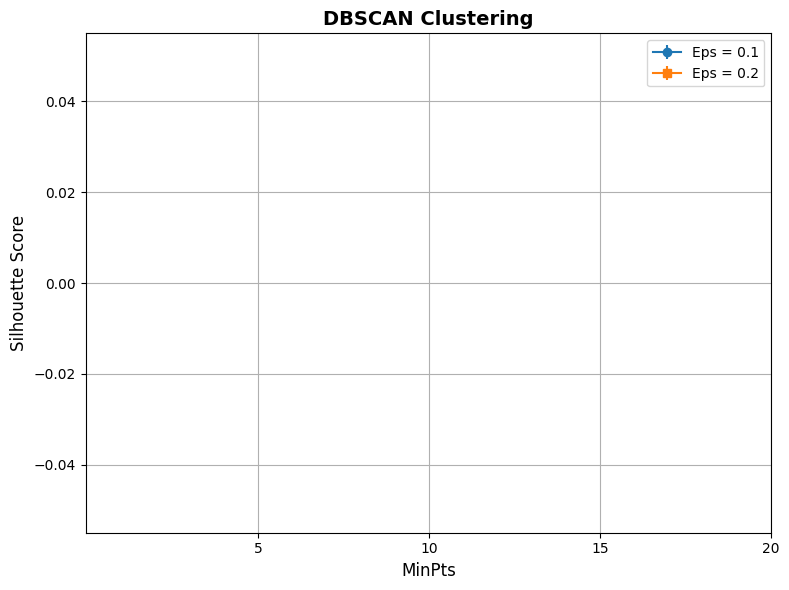

mean_scores: {0.1: [nan, nan, nan, nan], 0.2: [nan, nan, nan, nan]}
std_scores: {0.1: [nan, nan, nan, nan], 0.2: [nan, nan, nan, nan]}
mean_scores: {2.4: [np.float64(0.1991573190168729), np.float64(0.0038887324418265487), np.float64(0.14902293939986938), np.float64(0.12332876478056527)], 2.5: [np.float64(-0.01679114751922626), np.float64(0.03070278447839559), np.float64(0.18036446384466978), np.float64(0.16954380579567524)]}
std_scores: {2.4: [np.float64(0.0), np.float64(0.0), np.float64(2.7755575615628914e-17), np.float64(1.3877787807814457e-17)], 2.5: [np.float64(0.0), np.float64(3.469446951953614e-18), np.float64(0.0), np.float64(2.7755575615628914e-17)]}


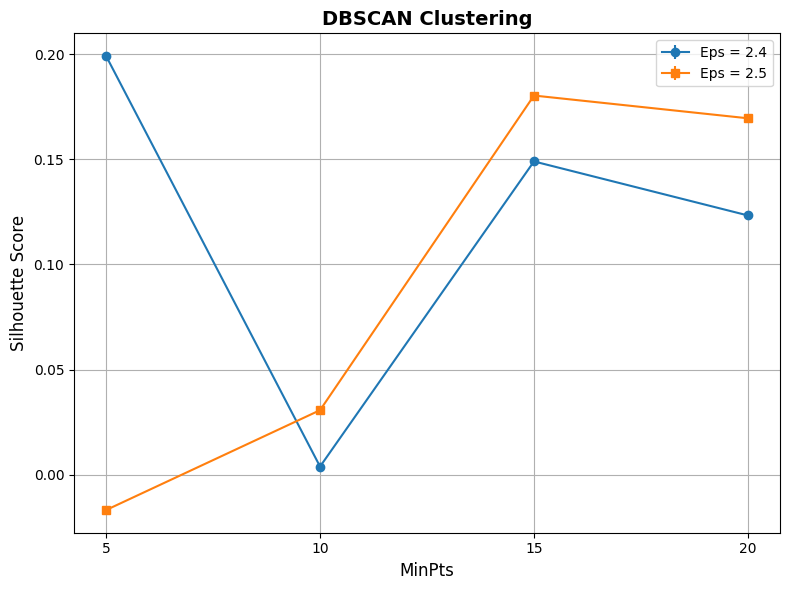

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
class DBSCAN:
  def __init__(self, eps, min_pts):
    self.eps = eps
    self.min_pts = min_pts
    self.labels = None

  def get_neighbors(self, X, point_idx):
    distances = np.linalg.norm(X - X[point_idx], axis = 1)
    neighbors = np.where(distances <= self.eps)[0]
    return neighbors

  def expand_cluster(self, X, labels, visited, point_idx, cluster_id, neighbors):
    labels[point_idx] = cluster_id
    seeds = list(neighbors)
    i = 0
    while i < len(seeds):
      seed = seeds[i]
      if labels[seed] == -1:
        labels[seed] = cluster_id
      if not visited[seed]:
        visited[seed] = True
        new_neighbors = self.get_neighbors(X, seed)
        if len(new_neighbors) >= self.min_pts:
          for n_idx in new_neighbors:
            if labels[n_idx] == -1 and n_idx not in seeds:
              seeds.append(n_idx)
      i += 1

  def fit(self, X):
    X = np.asarray(X)
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1 )
    visited = np.full(n_samples, False)
    cluster_id_counter = 0

    for point_idx in range(n_samples):
      if visited[point_idx]:
        continue

      visited[point_idx] = True
      neighbors = self.get_neighbors(X, point_idx)

      if len(neighbors) < self.min_pts:
        continue
      else:
        cluster_id_counter += 1
        self.expand_cluster(X, labels, visited, point_idx, cluster_id_counter, neighbors)
    self.labels = labels
    return self

  def fit_predict(self, X):
    self.fit(X)
    return self.labels

def run_dbscan(X, eps_values, min_pts_values, n_runs=10):
  X = np.asarray(X)
  mean_scores = {}
  std_scores = {}
  for eps in eps_values:
    eps_means = []
    eps_stds = []
    for min_pts in min_pts_values:
      scores = []
      for i in range(n_runs):
        model = DBSCAN(eps=eps, min_pts=min_pts)
        labels = model.fit_predict(X)
        unique_labels = np.unique(labels)
        if len(unique_labels) < 2:
          scores.append(np.nan)
        else:
          score = silhouette_score(X, labels)
          scores.append(score)
      valid_scores = [s for s in scores if not np.isnan(s)]
      if len(valid_scores) == 0:
        eps_means.append(np.nan)
        eps_stds.append(np.nan)
      else:
        eps_means.append(np.mean(valid_scores))
        eps_stds.append(np.std(valid_scores))

    mean_scores[eps] = eps_means
    std_scores[eps] = eps_stds
  return mean_scores, std_scores

def plot_dbscan(mean_scores, std_scores, min_pts_values, eps_values):
  min_pts_values = np.array(min_pts_values)
  plt.figure(figsize = (8,6))
  markers = ["o", "s", "D", "v"]
  for i, eps in enumerate(eps_values):
    mean = mean_scores[eps]
    std = std_scores[eps]
    plt.errorbar(
        min_pts_values,
        mean,
        yerr = std,
        marker = markers[i % len(markers)],
        linestyle = "-",
        label = f"Eps = {eps}"
    )

  plt.xlabel("MinPts", fontsize = 12)
  plt.xticks(min_pts_values)
  plt.ylabel("Silhouette Score", fontsize = 12)
  plt.title("DBSCAN Clustering", fontsize = 14, fontweight = "bold")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()
# run execution for eps = 0.1 and 0.2
scaler = StandardScaler()
X_array = scaler.fit_transform(X.values)
eps_values = [0.1, 0.2]
min_pts_values = [5, 10,15,20]
mean_scores, std_scores = run_dbscan(X_array, eps_values, min_pts_values, n_runs=10)
plot_dbscan(mean_scores, std_scores, min_pts_values, eps_values)
print("mean_scores:", mean_scores)
print("std_scores:", std_scores)

eps_values = [2.4, 2.5]
mean_scores2, std_scores2 = run_dbscan(X_array, eps_values, min_pts_values, n_runs=10)
print("mean_scores:", mean_scores2)
print("std_scores:", std_scores2)
plot_dbscan(mean_scores2, std_scores2, min_pts_values, eps_values)

# def scan_eps(X, min_pts, eps_values, n_runs = 10):
#   X = np.asarray(X)
#   mean_scores = []
#   std_scores = []
#   for eps in eps_values:
#     scores = []
#     for i in range(n_runs):
#       model = DBSCAN(eps=eps, min_pts=min_pts)
#       labels = model.fit_predict(X)

#       mask = labels != -1
#       X_non_noise = X[mask]
#       labels_non_noise = labels[mask]
#       if (len(np.unique(labels_non_noise)) < 2 or X_non_noise.shape[0] ==0):
#         scores.append(np.nan)
#       else:
#         score = silhouette_score(X_non_noise, labels_non_noise)
#         scores.append(score)
#     valid_scores = [s for s in scores if not np.isnan(s)]
#     if len(valid_scores) == 0:
#       mean_scores.append(np.nan)
#       std_scores.append(np.nan)
#     else:
#       mean_scores.append(np.mean(valid_scores))
#       std_scores.append(np.std(valid_scores))
#   return np.array(mean_scores),np.array(std_scores)

# def plot_scan_eps(mean_scores, std_scores, eps_values, min_pts):
#   eps_values = np.array(eps_values)
#   plt.figure(figsize = (8,6))

#   plt.errorbar(
#       eps_values,
#       mean_scores,
#       yerr = std_scores,
#       marker = "o",
#       linestyle = "-",
#       label = f"MinPts = {min_pts}"
#   )
#   plt.xlabel("Eps", fontsize = 12)
#   plt.ylabel("Silhouette Score", fontsize = 12)
#   plt.title("DBSCAN Clustering", fontsize = 14, fontweight = "bold")
#   plt.legend()
#   plt.grid(True)
#   plt.tight_layout()
#   plt.show()

## 3. Graph-based clustering with Spectral Clustering [10pts]
### What to implement:

You should implement the version of Spectral Clustering (titled “Un-normalized spectral clustering”) shown in Page 6 of [3]. You should implement the Gaussian
similarity function as described in Section 2 [3].

### What to plot:

The performance of spectral clustering as a function of k ranging from 1 to 5,
and for sigma equal to (1) 0.1, (2) 1, and (3) 10 (three lines in total)

[INSERT HERE: a brief description of how you went about implementing the solution to the question]

The question implements Unnomralized Spectral Clustering from the reference Von Luxburg.

Construct the Gaussian Similarity Matrix. Because similarity depends on Euclidean Distance, the data is standardize using StandardScaler to prevent large-scale features from dominating the similarity values.And compute the Unnormalized Graph Laplacian.

For spectral Embedding, the smallest k non-zero eigenvectors of L are extracted to form the special embedding matrix U. Since spectral clustering reduces the probllem to clustering rows of U, the custom K-means implementation from Q1 is applied to obtain the final labels.

Base on the question requirements,the algorithm is evaluated for k = 1,2,3,4,5, and std = 0.1, 1, 10 for 10 times and the mean and standard deviation of the silhouette score.
Since silhouette score requires at least 2 clusters, so K=1 yields NaN.


mean_scores: {0.1: array([        nan,  0.00061672, -0.05369243, -0.28048656, -0.24527169]), 1.0: array([       nan, 0.6128868 , 0.60770037, 0.46105903, 0.45806105]), 10.0: array([       nan, 0.66066688, 0.65133506, 0.6297054 , 0.55884897])}
std_scores: {0.1: array([       nan, 0.15965445, 0.1176045 , 0.10981698, 0.15756087]), 1.0: array([nan,  0.,  0.,  0.,  0.]), 10.0: array([           nan, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       0.00000000e+00])}


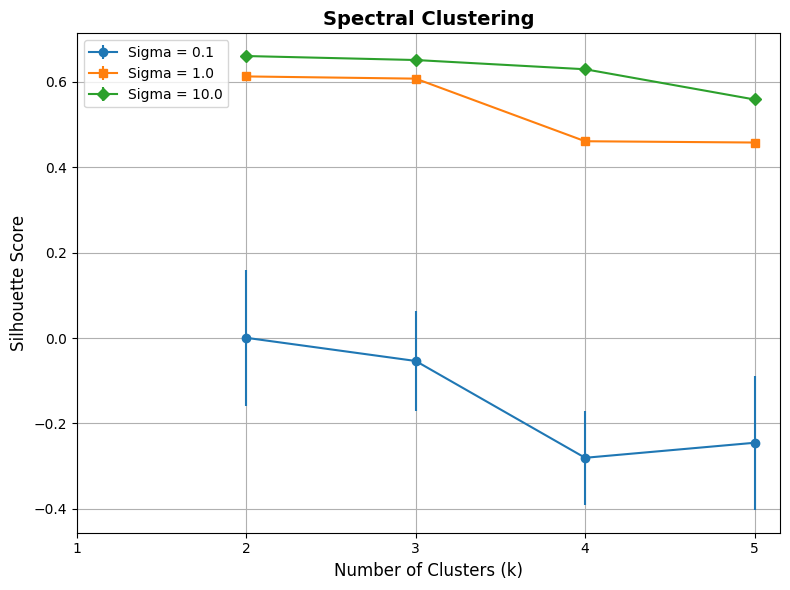

In [9]:
def compute_similarity_matrix(X, sigma):
  # Compute the Gaussian similarity Matrix W.
  X = np.asarray(X)
  squared_norm = np.sum(X ** 2, axis = 1)
  # Compute Pairwise squared Euclidean distance
  distances = squared_norm[:, np.newaxis] + squared_norm[np.newaxis, :] - 2 * np.dot(X, X.T)
  distances = np.maximum(distances, 0)
  W = np.exp(-distances / (2 * sigma ** 2))
  np.fill_diagonal(W, 0)
  return W

def compute_laplacian(W):
  # Compute the unnormalized graph Laplacian L = D-W
  W = np.asarray(W)
  degrees = np.sum(W, axis = 1)
  D = np.diag(degrees)
  L = D - W
  return L

def spectral_clustering(X, k, sigma, random_state=42):
  X = np.asarray(X)
  W = compute_similarity_matrix(X, sigma)
  L = compute_laplacian(W)
  # Eigen-decomposition of Laplacian
  eigenvalues, eigenvectors = np.linalg.eigh(L)
  # Take First K eigenvectors
  U = eigenvectors[:, :k]
  # Cluster in the spectral embedding space
  kmeans = KMeans(n_clusters=k, random_state=random_state, max_iter=300, init_type="kmeans++", tol=1e-4)
  labels = kmeans.fit_predict(U)
  return labels

def run_spectral_clustering(X, k_values, sigma_values, n_runs=10, base_seed=0):
  # evaluate spectral clustering performance
  # k in number of clusters, sigma in kernal bandwidth
  # using average silhoutte score over multiple random initialization
  X = np.asarray(X)
  mean_scores = {}
  std_scores = {}
  for sigma in sigma_values:
    s_means = []
    s_stds = []
    # iterate through number of clusters
    for k in k_values:
      if k == 1:
        s_means.append(np.nan)
        s_stds.append(np.nan)
        continue
      scores = []
      for i in range(n_runs):
        seed = base_seed + i
        labels = spectral_clustering(X,k,sigma,random_state=seed)
        unique_labels = np.unique(labels)
        # Silhouette requires at least 2 clusters.
        if len(unique_labels) < 2:
          scores.append(np.nan)
        else:
          score = silhouette_score(X, labels)
          scores.append(score)
      # Calculate mean and std
      valid_scores = [s for s in scores if not np.isnan(s)]
      if len(valid_scores) == 0:
        s_means.append(np.nan)
        s_stds.append(np.nan)
      else:
        s_means.append(np.mean(valid_scores))
        s_stds.append(np.std(valid_scores))
    mean_scores[sigma] = np.array(s_means)
    std_scores[sigma] = np.array(s_stds)
  return mean_scores,std_scores

def plot_spectral_clustering(mean_scores, std_scores, k_values, sigma_values):
  # Plot mean and std silhouette scores for different pairs
  k_values = np.array(k_values)
  plt.figure(figsize = (8,6))

  markers = ["o", "s", "D"]
  for i, sigma in enumerate(sigma_values):
    mean = mean_scores[sigma]
    std = std_scores[sigma]
    plt.errorbar(
        k_values,
        mean,
        yerr = std,
        marker = markers[i % len(markers)],
        linestyle = "-",
        label = f"Sigma = {sigma}"
    )
  plt.xlabel("Number of Clusters (k)", fontsize = 12)
  plt.xticks(k_values)
  plt.ylabel("Silhouette Score", fontsize = 12)
  plt.title("Spectral Clustering", fontsize = 14, fontweight = "bold")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_array = scaler.fit_transform(X.values)
k_values = [1,2,3,4,5]
sigma_values = [0.1, 1.0, 10.0]
mean_scores, std_scores = run_spectral_clustering(X_array, k_values, sigma_values = sigma_values, n_runs = 10, base_seed = 0)
print("mean_scores:", mean_scores)
print("std_scores:", std_scores)
plot_spectral_clustering(mean_scores, std_scores, k_values, sigma_values)

## 4. Anomaly detection with the Isolation Forest [15pts]
### What to implement:

You should implement the Isolation Forest anomaly detection algorithm as described in the original paper [4].

### What to plot:

The performance of k-means with k-means++ and k=2 on the data after
removing the top [1%, 5%, 10%, 15%] of anomalies as determined by the Isolation Forest.

[INSERT HERE: a brief description of how you went about implementing the solution to the question]

This question implement the isolation forest algorithm base on the paper from Liu, Ting, and Zhou.
Isolation Forest detects anomalies by recursively partitioning randomly selected subsamples of data. Points are easy to isolate receive high anomaly scores, while normal points require deeper splits.

The implementation constructs multiple isolation trees and compute the average path length of each sample, then convert it into an anomaly score using the function from the paper.

After computing anomaly scores on the full datset, points are sorted from most to least anomalous.

To visualize the result of how anomaly removal affects clustering quality, the top 1%, 5%, 10%, and 10% most anomalous points are removed.

For each cleaned dataset, k-means++ with k=2 is run 10 times to measure clustering stability. The Silhouette Score is used to evaluate cluster separation, and the mean and standard deviation across the 10 runs.



mean_scores: [0.34056326 0.33621889 0.33213449 0.33394925]
std_scores : [3.07780256e-04 5.55111512e-17 1.13639167e-03 7.00718713e-04]


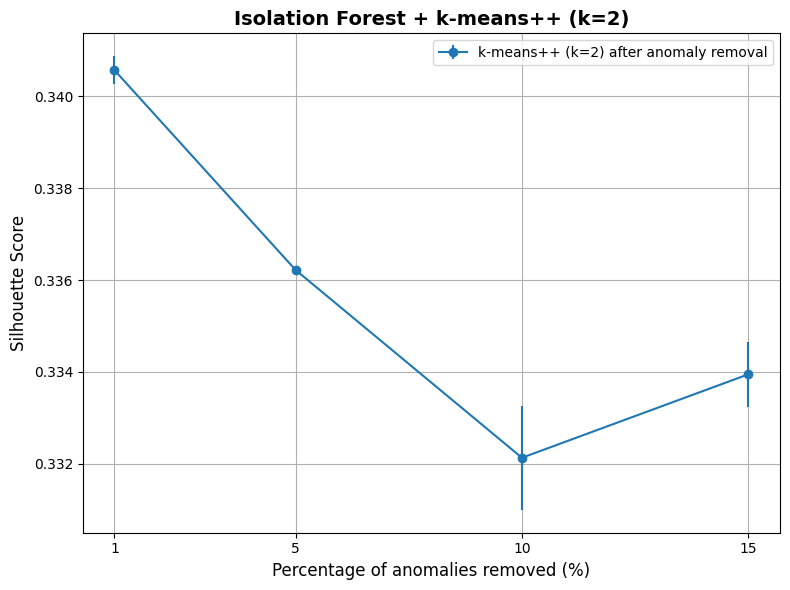

In [10]:
from sklearn.metrics import silhouette_score

class IsolationForest:
  def __init__(self, n_trees=100, subsample_size=256, max_depth=None, random_state=42):
    """
    n_tree: number of isolation trees to build in the forest
    subsample_size: Size ψ of the random subsample used for each tree
    max_depth: Maximum depth of each tree.
    random_state: Seed for random number generator
    """
    self.n_trees = n_trees
    self.subsample_size = subsample_size
    self.max_depth = max_depth
    self.random_state = random_state

    self.trees = []
    self._rng = None
    self._c_subsample = None

  @staticmethod
  def _c(n):
    # Base on the formula of the reference paper
    # Compute c(n), the average path length of unsuccessful search in a Binary Search Tree/
    if n <= 1:
        return 0.0
    gamma = 0.5772156649
    return 2.0 * (np.log(n - 1.0) + gamma) - 2.0 * (n - 1.0) / n

  def _build_tree(self, subsample, depth):
    n_samples, n_features = subsample.shape

    # Stopping Condition
    if depth >= self.max_depth or n_samples <= 1:
        return {
            "is_leaf": True,
            "size": int(n_samples),
            "feature": None,
            "threshold": None,
            "left": None,
            "right": None
        }

    # Random choose a feature to split
    q = self._rng.integers(0, n_features)
    col = subsample[:, q]
    min_v, max_v = col.min(), col.max()

    # If all values are identical, we cannot split further => leaf
    if min_v == max_v:
        return {
            "is_leaf": True,
            "size": int(n_samples),
            "feature": None,
            "threshold": None,
            "left": None,
            "right": None
        }

    # Randomly choose a split threshold between min and max
    threshold = self._rng.uniform(min_v, max_v)
    # Split data base on the threshold
    left_mask = col < threshold
    right_mask = ~left_mask

    # If one side is empty, treat it as a leaf
    if left_mask.sum() == 0 or right_mask.sum() == 0:
        return {
            "is_leaf": True,
            "size": int(n_samples),
            "feature": None,
            "threshold": None,
            "left": None,
            "right": None
        }

    left_sub = subsample[left_mask]
    right_sub = subsample[right_mask]
    # recursively build left and right subtrees
    left_child = self._build_tree(left_sub, depth + 1)
    right_child = self._build_tree(right_sub, depth + 1)

    return {
        "is_leaf": False,
        "size": int(n_samples),
        "feature": int(q),
        "threshold": float(threshold),
        "left": left_child,
        "right": right_child
    }

  def fit(self, X):
    X = np.asarray(X)
    n_samples, n_features = X.shape
  # Ensure subsample size does not exceed total number
    psi = min(self.subsample_size, n_samples)
    self.subsample_size = psi
  # If max_depth is not set, use the recommended ceil
    if self.max_depth is None:
        self.max_depth = int(np.ceil(np.log2(psi)))
    self._rng = np.random.default_rng(self.random_state)
  # Precompute for anomaly score normalization
    self._c_subsample = self._c(psi)
  # Build each isolation tree
    self.trees = []
    for _ in range(self.n_trees):
        indices = self._rng.choice(n_samples, size=psi, replace=False)
        subsample = X[indices]
        # Build a tree on this subsample
        tree = self._build_tree(subsample, depth=0)
        self.trees.append(tree)
    return self

  def _path_length_single_tree(self, x, node, depth=0):
      # Compute the path length of a single sample x in One isolation tree.
      if node["is_leaf"]:
          size = node["size"]
          if size <= 1:
              return float(depth)
          else:
              return depth + self._c(size)
      # Continue Traversing
      q = node["feature"]
      thres = node["threshold"]

      if x[q] < thres:
          return self._path_length_single_tree(x, node["left"], depth + 1)
      else:
          return self._path_length_single_tree(x, node["right"], depth + 1)

  def _avg_path_length(self, X):
      # Compute average path length over all trees for each sample
      X = np.asarray(X)
      n_samples = X.shape[0]
      path_lengths = np.zeros(n_samples)
      # Sum path length from all trees
      for tree in self.trees:
          for i in range(n_samples):
              h = self._path_length_single_tree(X[i], tree, depth=0)
              path_lengths[i] += h
      # Calculate the average
      path_lengths /= float(self.n_trees)
      return path_lengths

  def anomaly_scores(self, X):
      # Compute anomly scores for all samples in X
      # use the score formula from the paper
      X = np.asarray(X)
      avg_path = self._avg_path_length(X)
      c_n = self._c_subsample
      if c_n <= 0:
          c_n = 1.0
      scores = np.power(2.0, -avg_path / c_n)
      return scores

  def fit_predict(self, X):
      self.fit(X)
      return self.anomaly_scores(X)
# Anomaly removal and k-means evaluation Logic
def run_isolation_kmeans(
    X,
    removal_percents,
    n_trees=100,
    subsample_size=256,
    n_runs=10,
    base_seed=0
):
  X = np.asarray(X)
  n_samples = X.shape[0]

  # Train Isolation Forest on the whole dataset
  iso = IsolationForest(
      n_trees=n_trees,
      subsample_size=subsample_size,
      random_state=base_seed
  )
  iso.fit(X)
  scores = iso.anomaly_scores(X)

  # Rank points by anomaly score
  sorted_idx = np.argsort(scores)[::-1]

  mean_scores = []
  std_scores = []
  # Iterate through different anomly removal percentage
  for p in removal_percents:
      frac = p / 100.0
      n_remove = int(np.floor(frac * n_samples))
      n_remove = max(1, n_remove)
      # Create a mask to select points to keep
      keep_mask = np.ones(n_samples, dtype=bool)
      keep_mask[sorted_idx[:n_remove]] = False
      X_clean = X[keep_mask]
      # Skip if too few samples remain for clustering
      if X_clean.shape[0] < 3:
          mean_scores.append(np.nan)
          std_scores.append(np.nan)
          continue

      scores_this_p = []
      # Repeat K-mans n_runs time s to measure stability
      for i in range(n_runs):
          seed = base_seed + i
          kmeans = KMeans(
              n_clusters=2,
              init_type="kmeans++",
              max_iter=300,
              tol=1e-4,
              random_state=seed
          )
          labels = kmeans.fit_predict(X_clean)

          if len(np.unique(labels)) < 2:
              scores_this_p.append(np.nan)
          else:
              s = silhouette_score(X_clean, labels)
              scores_this_p.append(s)
      # Filter out NaNs and compute mean/std
      valid_scores = [s for s in scores_this_p if not np.isnan(s)]

      if len(valid_scores) == 0:
          mean_scores.append(np.nan)
          std_scores.append(np.nan)
      else:
          mean_scores.append(np.mean(valid_scores))
          std_scores.append(np.std(valid_scores))

  return np.array(mean_scores), np.array(std_scores)

def plot_isolation_results(removal_percents, mean_scores, std_scores):
  x = np.array(removal_percents, dtype=float)
  # visualize the silhouette score
  plt.figure(figsize=(8, 6))
  plt.errorbar(
      x,
      mean_scores,
      yerr=std_scores,
      marker="o",
      linestyle="-",
      label="k-means++ (k=2) after anomaly removal"
  )
  plt.xlabel("Percentage of anomalies removed (%)", fontsize=12)
  plt.ylabel("Silhouette Score", fontsize=12)
  plt.title("Isolation Forest + k-means++ (k=2)", fontsize=14, fontweight="bold")
  plt.grid(True)
  plt.xticks(x)
  plt.legend()
  plt.tight_layout()
  plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_array = scaler.fit_transform(X.values)
removal_percents = [1, 5, 10, 15]

iso_mean, iso_std = run_isolation_kmeans(
    X_array,
    removal_percents=removal_percents,
    n_trees=100,
    subsample_size=256,
    n_runs=10,
    base_seed=0
)

print("mean_scores:", iso_mean)
print("std_scores :", iso_std)

plot_isolation_results(removal_percents, iso_mean, iso_std)

Reference:
- Von Luxburg, Ulrike. ”A tutorial on spectral clustering.” Statistics and computing 17 (2007):
395-416.
- Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. ”Isolation forest.” In 2008 eighth ieee
international conference on data mining, pp. 413-422. IEEE, 2008.
- Arthur, D. and Vassilvitskii, S., 2007, January. k-means++: The advantages of careful seeding.
In Soda (Vol. 7, pp. 1027-1035).
- Use Gemini to help me understand the formula on the paper.